In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [2]:
data= pd.read_excel("play.xlsx")
data.head()

,Outlook,Temperature,Humidity,Windy,Decision
0,overcast,72,90,strong,play
1,overcast,83,78,weak,play
2,overcast,64,65,strong,play
3,overcast,81,75,weak,play
4,sunny,75,70,strong,play


In [3]:
from sklearn import preprocessing
data_norm = data.copy()
scaler = preprocessing.MinMaxScaler()
data_norm[['Temperature','Humidity']] = scaler.fit_transform(data_norm[['Temperature','Humidity']])

In [4]:
data_norm = pd.get_dummies(data_norm, columns=["Outlook","Windy","Decision"])
X = data_norm.iloc[:,[0,4]].values

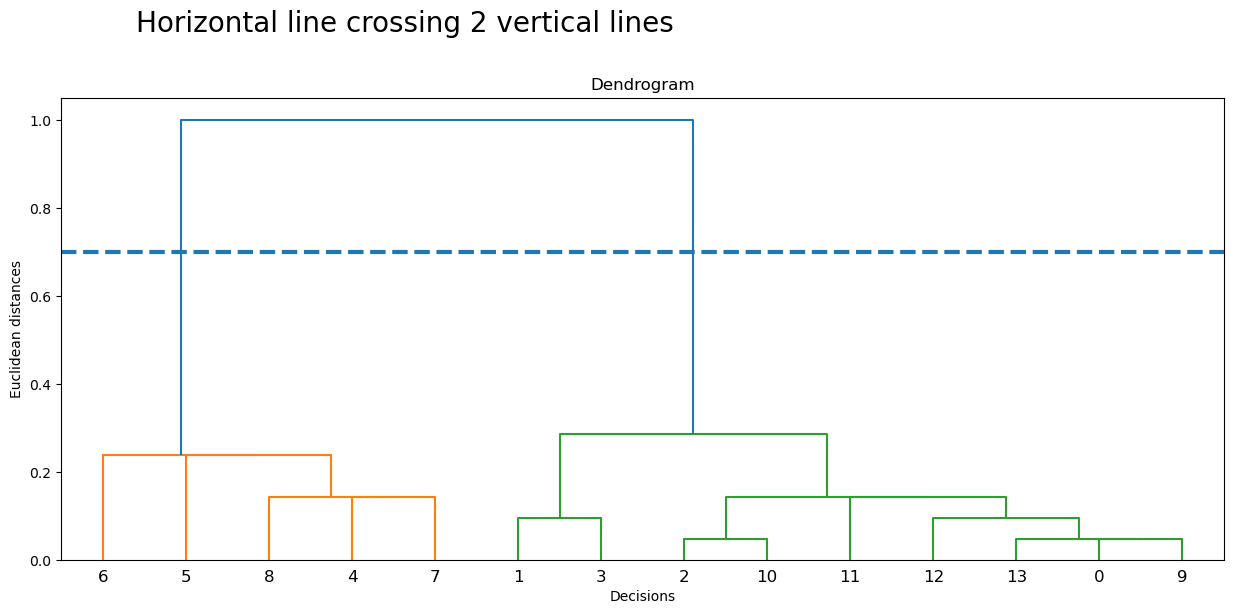

In [5]:
plt.figure(figsize=(15,6))
plt.title('Dendrogram')
plt.xlabel('Decisions')
plt.ylabel('Euclidean distances')
plt.hlines(y=0.7,xmin=0,xmax=2000,lw=3,linestyles='--')
plt.text(x=9,y=1.2,s='Horizontal line crossing 2 vertical lines',fontsize=20)
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'single'))
plt.show()

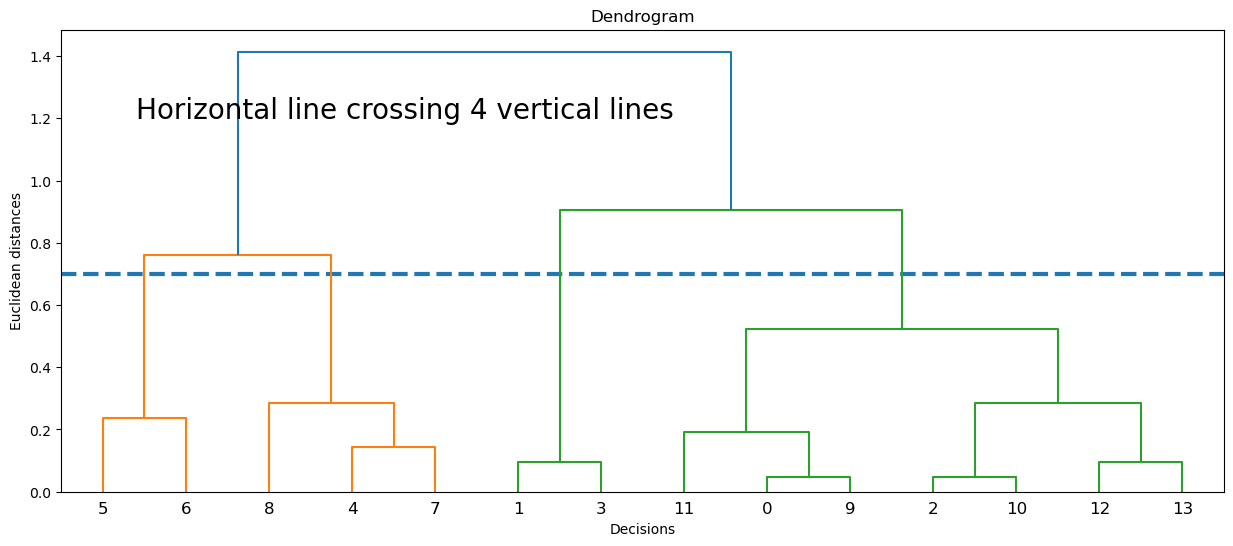

In [6]:
plt.figure(figsize=(15,6))
plt.title('Dendrogram')
plt.xlabel('Decisions')
plt.ylabel('Euclidean distances')
plt.hlines(y=0.7,xmin=0,xmax=2000,lw=3,linestyles='--')
plt.text(x=9,y=1.2,s='Horizontal line crossing 4 vertical lines',fontsize=20)
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'complete'))
plt.show()

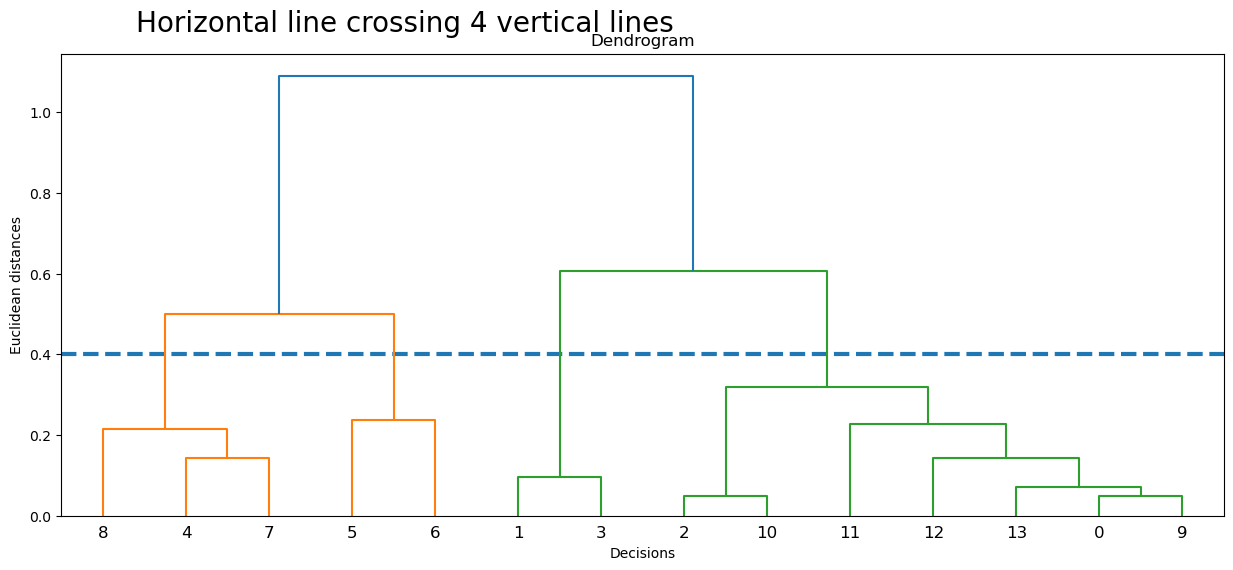

In [7]:
plt.figure(figsize=(15,6))
plt.title('Dendrogram')
plt.xlabel('Decisions')
plt.ylabel('Euclidean distances')
plt.hlines(y=0.4,xmin=0,xmax=2000,lw=3,linestyles='--')
plt.text(x=9,y=1.2,s='Horizontal line crossing 4 vertical lines',fontsize=20)
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average'))
plt.show()

In [8]:
from sklearn.datasets import make_circles
from sklearn import cluster, datasets

X, Y  = datasets.make_circles(n_samples=300, noise=0.02,factor=0.5)

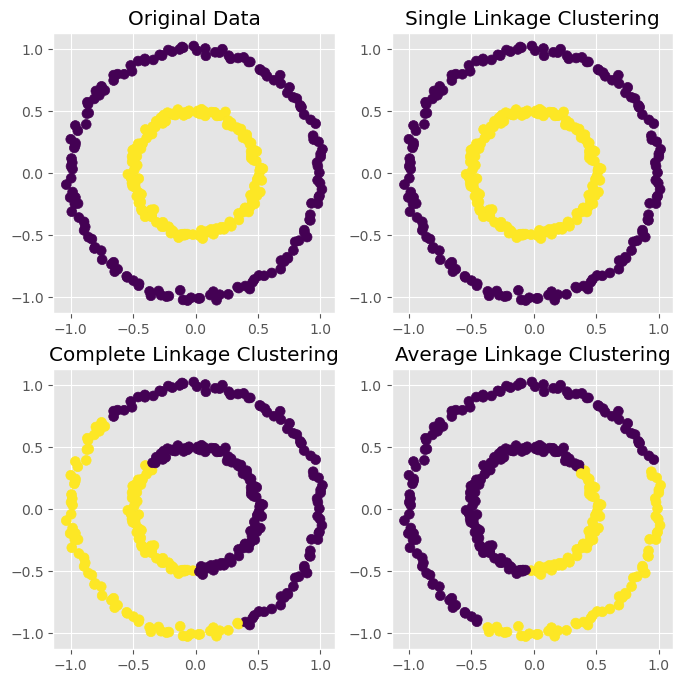

In [9]:
clustering = AgglomerativeClustering(n_clusters=2, linkage="single")
Y_preds = clustering.fit_predict(X)
clustering = AgglomerativeClustering(n_clusters=2, linkage="complete")
Y_preds1 = clustering.fit_predict(X)
clustering = AgglomerativeClustering(n_clusters=2, linkage="average")
Y_preds2 = clustering.fit_predict(X)
def plot_actual_prediction_moons(X,Y,Y_preds):
    with plt.style.context("ggplot"):
        plt.figure(figsize=(8,8))

        plt.subplot(2,2,1)
        plt.scatter(X[:,0],X[:,1], c = Y, marker="o", s=50)
        plt.title("Original Data")

        plt.subplot(2,2,2)
        plt.scatter(X[:,0],X[:,1], c = Y_preds , marker="o", s=50)
        plt.title("Single Linkage Clustering")

        plt.subplot(2,2,3)
        plt.scatter(X[:,0],X[:,1], c = Y_preds1 , marker="o", s=50)
        plt.title("Complete Linkage Clustering")

        plt.subplot(2,2,4)
        plt.scatter(X[:,0],X[:,1], c = Y_preds2 , marker="o", s=50)
        plt.title("Average Linkage Clustering")

plot_actual_prediction_moons(X, Y, Y_preds)

In [10]:
df= pd.read_excel("boston housing.xls")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


<AxesSubplot:>

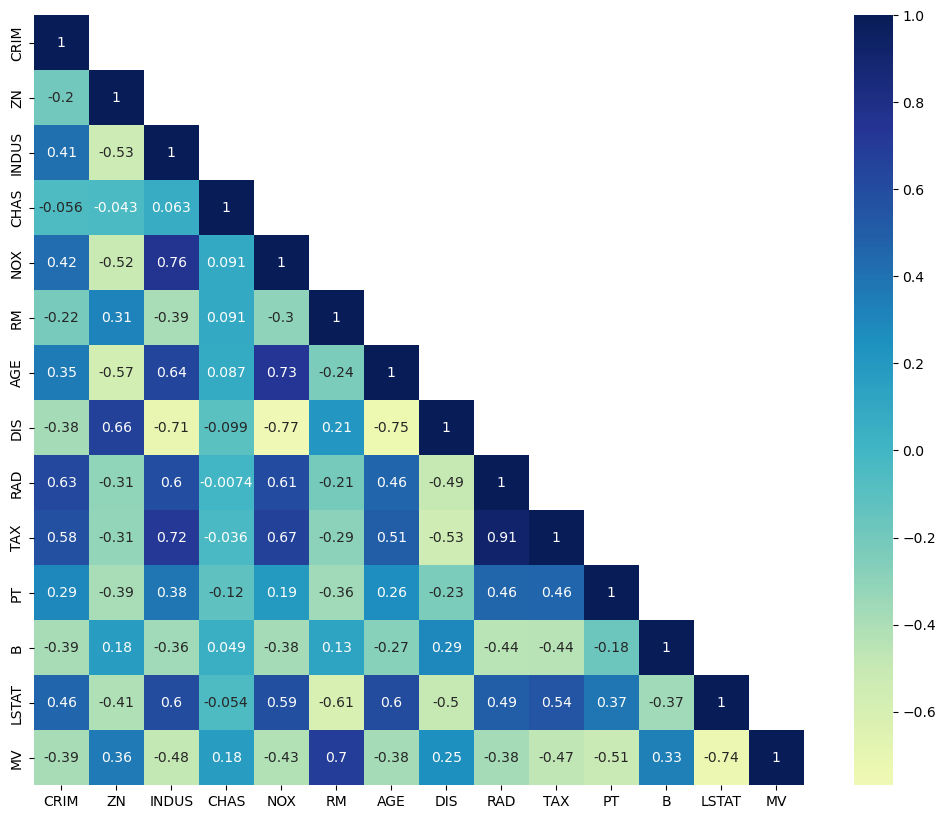

In [11]:
plt.figure(figsize=(13, 10))

mask_upper_triangle = np.triu(np.ones_like(df.corr(), dtype=bool), k=1)

sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, mask=mask_upper_triangle,
            square=True, center = 0 )

In [12]:
df["RAD"]=df["RAD"].astype("category")
#datatype of the df
df.dtypes

CRIM      float64
ZN        float64
INDUS     float64
CHAS        int64
NOX       float64
RM        float64
AGE       float64
DIS       float64
RAD      category
TAX         int64
PT        float64
B         float64
LSTAT     float64
MV        float64
dtype: object

In [13]:
#now using df.get_dummies(); it will drop the original column also
#this method will automatically pick the categorical variable and apply 1-hot encoding
df=pd.get_dummies(df,prefix="RAD")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PT,...,MV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,296,15.300000,...,24.000000,1,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,242,17.799999,...,21.600000,0,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,242,17.799999,...,34.700001,0,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,222,18.700001,...,33.400002,0,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,222,18.700001,...,36.200001,0,0,1,0,0,0,0,0,0


In [14]:
cor_matrix = df.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print(to_drop)

['RAD_24']


C:\Users\pkala\AppData\Local\Temp\ipykernel_5824\3371422107.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [15]:
df = df.drop(['RAD_24'], axis = 1)

In [16]:
#now doing Scaling on entire Dataset

scaler=MinMaxScaler();
scaler=scaler.fit(df)

scaledData=scaler.transform(df)

#now create the scaled dataframe from it
dss=pd.DataFrame(scaledData,columns=df.columns)

In [17]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(dss)
    Sum_of_squared_distances.append(km.inertia_)

C:\Users\pkala\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


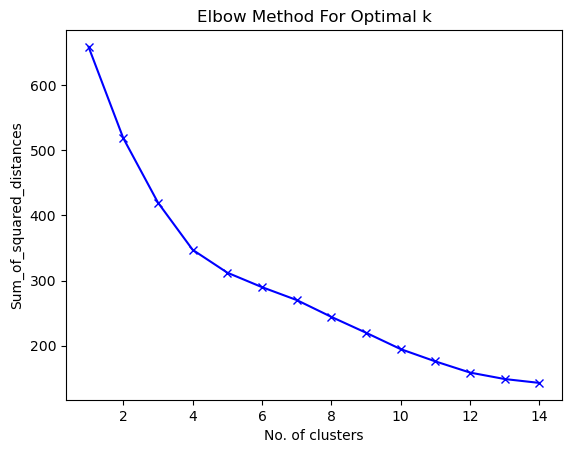

In [18]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [19]:
!pip install --upgrade kneed

In [20]:
# This tells us the optimal value of k
from kneed import KneeLocator
kl = KneeLocator(range(1, 15), Sum_of_squared_distances, curve="convex", direction="decreasing")
kl.elbow


4

In [21]:
dss.shape

(506, 21)

In [22]:
#to find corelation matrix 
dss.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PT,...,LSTAT,MV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.582764,0.289946,...,0.455621,-0.388305,-0.084456,-0.091673,-0.116598,-0.197472,-0.184650,-0.093806,-0.075143,-0.084191
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.314563,-0.391679,...,-0.412995,0.360445,0.248457,0.086702,0.061369,0.076190,-0.005934,0.016154,0.122776,-0.048974
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.720760,0.383248,...,0.603800,-0.483725,-0.179690,-0.049031,-0.279307,-0.030002,-0.108959,-0.099794,-0.166009,-0.169444
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.035587,-0.121515,...,-0.053929,0.175260,-0.015326,-0.060828,-0.018572,0.007389,0.056601,-0.063444,-0.050827,0.122381
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.668023,0.188933,...,0.590879,-0.427321,-0.160877,-0.134503,-0.251740,-0.229389,0.075839,-0.080115,-0.183122,-0.119886
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.292048,-0.355502,...,-0.613808,0.695360,0.078383,0.116137,0.076479,-0.113768,0.083847,-0.059651,0.096459,0.211773
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.506456,0.261515,...,0.602339,-0.376955,-0.169885,-0.030186,-0.195206,-0.144934,0.012508,-0.069790,-0.188527,-0.009720
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.534432,-0.232471,...,-0.496996,0.249929,0.215315,0.032031,0.183063,0.159835,-0.025191,0.025432,0.239385,0.065296
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,1.000000,0.460853,...,0.543993,-0.468536,-0.140710,-0.195576,-0.274436,-0.226179,-0.246066,-0.048868,-0.114976,-0.141791
PT,0.289946,-0.391679,0.383248,-0.121515,0.188933,-0.355502,0.261515,-0.232471,0.460853,1.000000,...,0.374044,-0.507787,-0.083528,-0.120079,-0.037827,0.165909,-0.478578,-0.068886,-0.004280,-0.049578


In [23]:
clust=KMeans(n_clusters=4,max_iter=500,random_state=0).fit(dss)

#now extract the clusterCenters
clusterCenter=clust.cluster_centers_

#convert clusterCenter to dataframe to do the cluster profilin
ccd=pd.DataFrame(clusterCenter,columns=dss.columns)

#ccd for cluster profilin
ccd


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PT,...,LSTAT,MV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8
0,0.007660,1.110870e-01,0.340903,0.095652,0.382476,0.542663,0.683043,0.233496,0.276419,0.419889,...,0.246336,0.460155,-4.857226e-17,-2.775558e-17,-1.387779e-17,0.000000e+00,1.000000e+00,-2.775558e-17,-2.081668e-17,-2.775558e-17
1,0.120805,1.804112e-16,0.641152,0.050955,0.559160,0.466767,0.886078,0.088189,0.833325,0.784998,...,0.457611,0.259151,-1.387779e-17,4.458599e-02,1.804112e-16,2.547771e-02,3.885781e-16,8.917197e-02,-2.081668e-17,5.551115e-17
2,0.001530,2.228125e-01,0.161671,0.062500,0.154255,0.590940,0.490707,0.384015,0.185487,0.549784,...,0.178506,0.500122,1.562500e-01,1.328125e-01,2.968750e-01,1.942890e-16,2.498002e-16,9.375000e-02,1.328125e-01,1.875000e-01
3,0.004455,1.528774e-01,0.353570,0.075472,0.237367,0.497516,0.582690,0.309371,0.257310,0.691489,...,0.278213,0.372893,-3.469447e-17,-2.081668e-17,0.000000e+00,1.000000e+00,1.665335e-16,-2.775558e-17,-2.081668e-17,-2.081668e-17


In [24]:
labels=clust.labels_
labels

array([2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0,

In [25]:
#total labels;
len(labels)
clusterIds=list(labels)

In [26]:
#now perform the inverse Scaling
originalDataAsNumpy=scaler.inverse_transform(dss)
#converting numpy to dataset
originalDataset=pd.DataFrame(originalDataAsNumpy,columns=dss.columns)

#adding the labelled column to the originalDataset
originalDataset["Label"]=labels

In [27]:
originalDataset.Label[0]


2

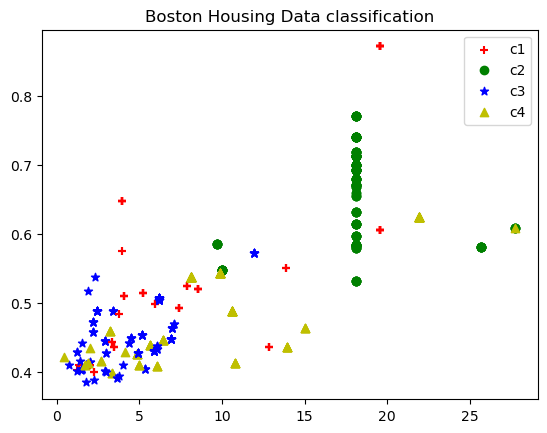

In [28]:
import pylab as pl
len=originalDataset.shape[0]
len
for i in range(0, len):
   if originalDataset.Label[i] == 0:
      c1 = pl.scatter(originalDataset.iloc[i,2],originalDataset.iloc[i,4],c='r', marker='+')
   elif originalDataset.Label[i]  == 1:
      c2 = pl.scatter(originalDataset.iloc[i,2],originalDataset.iloc[i,4],c='g',marker='o')
   elif originalDataset.Label[i]  == 2:
      c3 = pl.scatter(originalDataset.iloc[i,2],originalDataset.iloc[i,4],c='b',marker='*')
   elif originalDataset.Label[i] == 3:
      c4 = pl.scatter(originalDataset.iloc[i,2],originalDataset.iloc[i,4],c='y',marker='^')
pl.legend([c1, c2, c3,c4], ['c1','c2','c3','c4'])  
pl.title('Boston Housing Data classification')
pl.show()